# Practice Python coding
## Analysis of rental prices using Zillow pricing dataset from Kaggle
### Link provided below:

The following are Python codes to install the packages needed for this work

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import *
from ipywidgets import interact
plt.style.use('seaborn-colorblind')

# This makes sure that graphs render in your notebook.
%matplotlib inline

In [2]:
zrent = pd.read_csv('Zillow_Pricing_Data.csv')

In [5]:
zrent.head(10)

,City Code,City,Metro,County,State,Population Rank,Nov-10,Dec-10,Jan-11,Feb-11,...,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1087.0,1080.0,1071.0,1067.0,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,1247
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1188.0,1183.0,1178.0,1177.0,...,1222,1225,1227,1227,1227,1228,1230,1234,1237,1239
7,6915,San Antonio,San Antonio,Bexar,TX,8,1057.0,1043.0,1037.0,1032.0,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,1250
8,54296,San Diego,San Diego,San Diego,CA,9,2070.0,2059.0,2043.0,2030.0,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,2469
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1114.0,1135.0,1156.0,1159.0,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,1391


In [7]:
zrent = zrent.melt(id_vars=['City Code', 'City','Metro','County','State','Population Rank'], var_name='date')

In [13]:
zrent.sort_values(['State', 'City', 'Metro', 'County', 'date'])

,City Code,City,Metro,County,State,Population Rank,date,value
77859,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Apr-11,1328.0
235431,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Apr-12,1224.0
393003,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Apr-13,1194.0
550575,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Apr-14,1141.0
708147,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Apr-15,1284.0
865719,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Apr-16,1350.0
130383,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Aug-11,1360.0
287955,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Aug-12,1197.0
445527,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Aug-13,1137.0
603099,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,Aug-14,1057.0


In [81]:
zrent['month'] = zrent['date'].str[:3]
zrent['year'] = zrent['date'].str[4:6]
zrent = zrent.rename(columns={"value": "median_price"})

In [96]:
zrent['year'] = '20' + zrent['year'].astype(str)

In [98]:
zrent['MoYr'] = zrent['month'] + ' ' + zrent['year']

In [101]:
zrent['date'] =  pd.to_datetime(zrent['MoYr'])

In [105]:
zrent = zrent.drop(columns=['MoYr'])

In [106]:
zrent = zrent.sort_values(['State', 'City', 'Metro', 'County', 'date'])

In [ ]:
zrent.set_index('date', inplace=True)

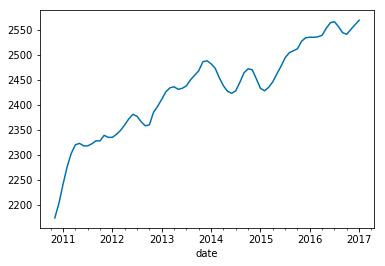

In [120]:
zrent[(zrent.State == 'DC')].median_price.plot();
#deaths.deaths.plot(figsize=(16,8));

In [119]:
zrent.head()

,City Code,City,Metro,County,State,Population Rank,median_price,year,month
date,,,,,,,,,
2010-11-01,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,NaN,2010,Nov
2010-12-01,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,NaN,2010,Dec
2011-01-01,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,NaN,2011,Jan
2011-02-01,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,NaN,2011,Feb
2011-03-01,28124,Anchor Point,NaN,Kenai Peninsula,AK,12205,1351.0,2011,Mar


In [112]:
#zrent[(zrent.State == 'DC')]

,City Code,City,Metro,County,State,Population Rank,date,median_price,year,month
25,41568,Washington,Washington,District of Columbia,DC,26,2010-11-01,2174.0,2010,Nov
13156,41568,Washington,Washington,District of Columbia,DC,26,2010-12-01,2203.0,2010,Dec
26287,41568,Washington,Washington,District of Columbia,DC,26,2011-01-01,2241.0,2011,Jan
39418,41568,Washington,Washington,District of Columbia,DC,26,2011-02-01,2276.0,2011,Feb
52549,41568,Washington,Washington,District of Columbia,DC,26,2011-03-01,2303.0,2011,Mar
65680,41568,Washington,Washington,District of Columbia,DC,26,2011-04-01,2320.0,2011,Apr
78811,41568,Washington,Washington,District of Columbia,DC,26,2011-05-01,2323.0,2011,May
91942,41568,Washington,Washington,District of Columbia,DC,26,2011-06-01,2318.0,2011,Jun
105073,41568,Washington,Washington,District of Columbia,DC,26,2011-07-01,2318.0,2011,Jul
118204,41568,Washington,Washington,District of Columbia,DC,26,2011-08-01,2322.0,2011,Aug


In [72]:
zrent.dtypes

City Code            int64
City                object
Metro               object
County              object
State               object
Population Rank      int64
date                object
value              float64
Month               object
Month2              object
year                object
month               object
dtype: object